In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [3]:
# lets check the list of columns we have in the dataset
df.columns.to_list()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [4]:
# Lets check the dimention of the dataset provided
df.shape

(31647, 18)

In [5]:
# checking the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
# gathering the Stastical information
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
for col in df.select_dtypes(include="object").columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


In [8]:
# dropping the Id columns as it doesnt contribute to the subscription analysis
df.drop(columns=["ID"],axis=1,inplace=True)
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
24349,53,services,married,primary,no,46,yes,no,unknown,7,may,274,1,-1,0,unknown,no
12850,38,entrepreneur,divorced,secondary,no,36,no,no,cellular,18,nov,84,2,-1,0,unknown,no
27070,57,admin.,married,secondary,no,367,no,no,telephone,16,nov,107,2,-1,0,unknown,no
20846,32,self-employed,divorced,tertiary,no,3695,yes,no,cellular,15,may,34,1,353,3,other,no
24370,36,blue-collar,married,unknown,no,-389,yes,no,unknown,14,may,76,9,-1,0,unknown,no
29856,36,admin.,single,secondary,no,98,yes,no,unknown,21,may,68,1,-1,0,unknown,no
686,38,services,married,tertiary,no,1324,yes,no,cellular,3,feb,178,1,-1,0,unknown,no
16962,38,management,single,unknown,no,715,yes,no,cellular,21,nov,140,1,185,2,failure,no
2780,37,blue-collar,married,secondary,no,509,yes,no,cellular,20,apr,172,1,-1,0,unknown,no
9509,27,management,single,tertiary,no,2849,no,no,cellular,5,feb,335,1,-1,0,unknown,no


## Exploratory data analysis
- Find unwanted columns
- Find Missing Values
- Find Features with One value
- Explore The categorical features
- Find categorical feature distribution
- relationship between categorical features and label
- Explore the numerical columns
- Find discrete numerical features
- Relation between discrete numerical features and target variable
- find continuous Numerical features
- Relation between continuous numerical feature and target variable
- Find outliers Between numerical features
- Explore the correlation between numerical features
- find pairplot
- check the dataset is balanced or not based on target varible in classification.

### 1. Finding the unwanted columns

The unwanted column was Id which we removed earlier.

### 2.Find the missing values

In [9]:
features_na = [features for features in df.columns if df[features].isnull().sum()>0]
for feature in features_na:
    print(feature,np.round(df[feature].isnull().mean(),4,"% missing values"))
else:
    print("NO missing values")

NO missing values


### 3.Find feature with one value

In [10]:
for col in df.columns:
    print(col,df[col].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 6326
housing 2
loan 2
contact 3
day 31
month 12
duration 1454
campaign 45
pdays 509
previous 38
poutcome 4
subscribed 2


Thus there is no feature with one value

### 4. Explore the categorical feature

In [11]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtype=='O')&(feature not in ['subscribed']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [12]:
for feature in categorical_features:
    print("{} have {} number of categories".format(feature,len(df[feature].unique())) )

job have 12 number of categories
marital have 3 number of categories
education have 4 number of categories
default have 2 number of categories
housing have 2 number of categories
loan have 2 number of categories
contact have 3 number of categories
month have 12 number of categories
poutcome have 4 number of categories


### 5. Find categorical feature distribution

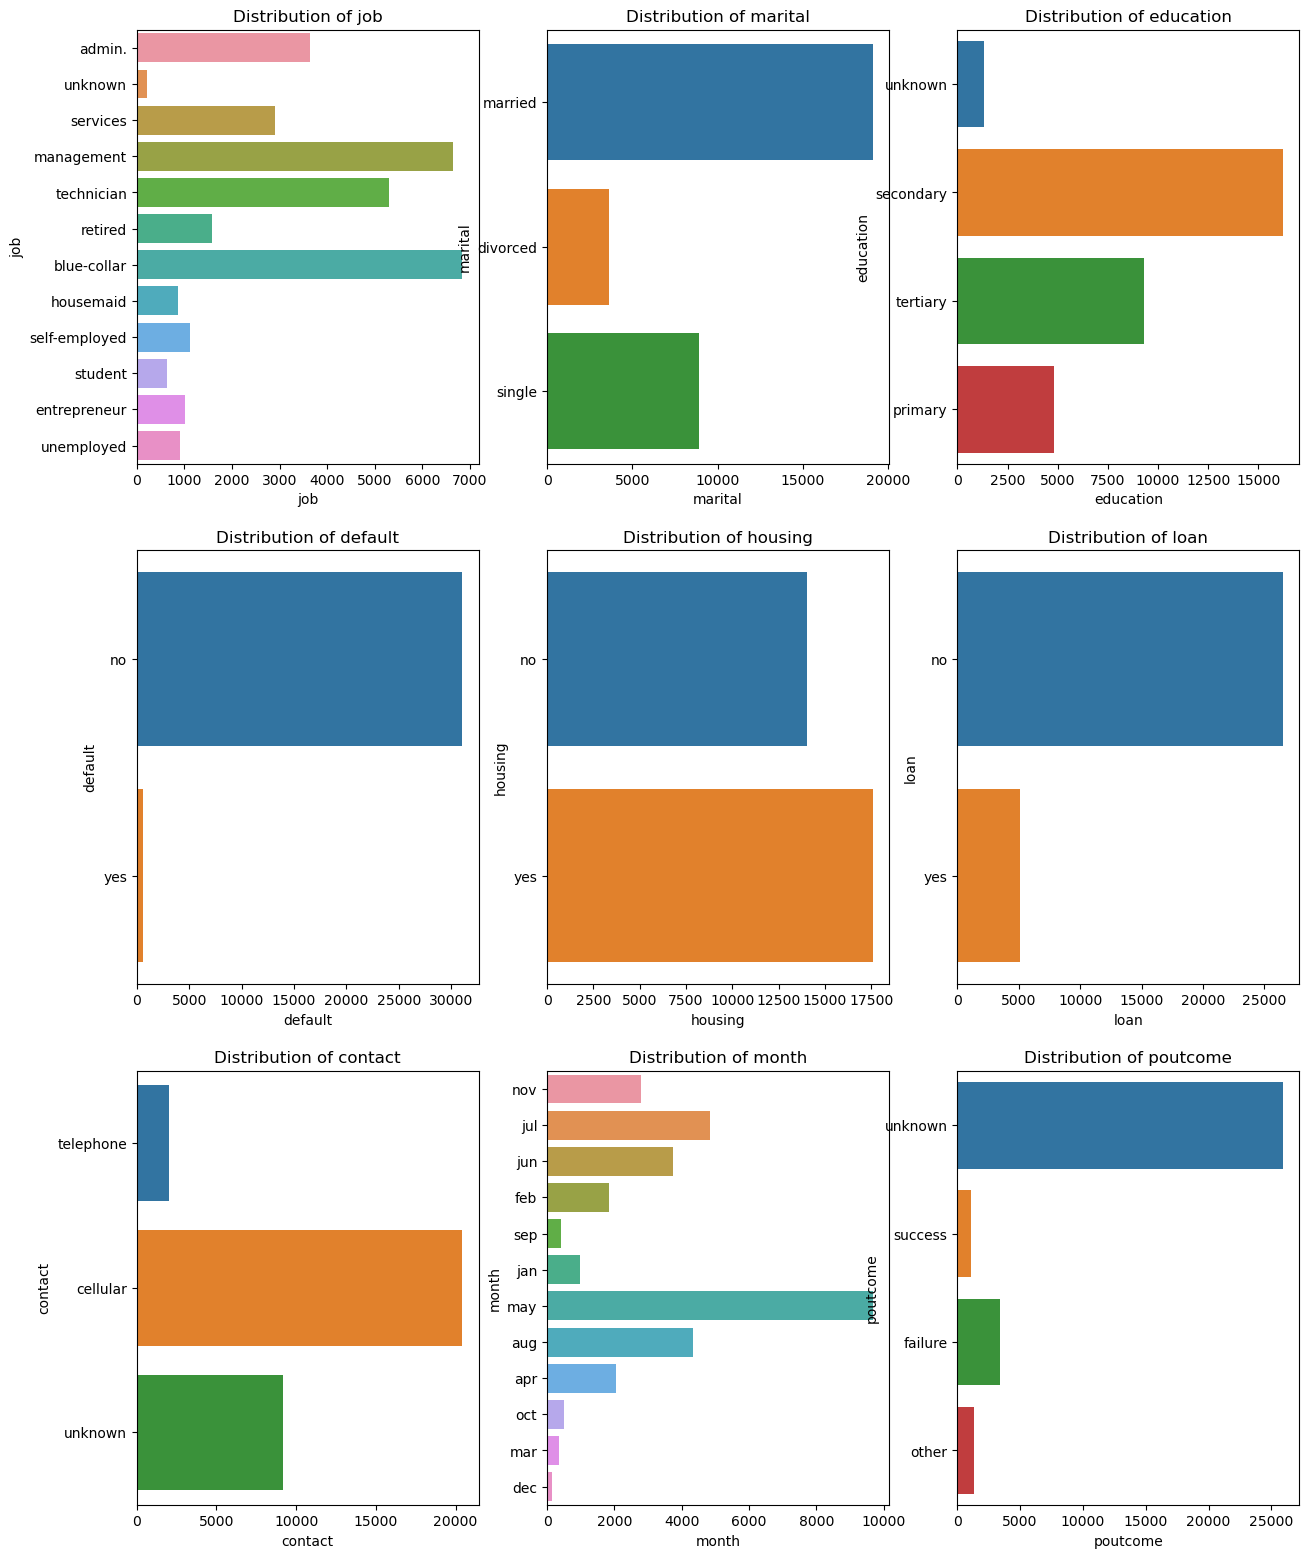

In [13]:
# check count based on categorical features
plt.figure(figsize=(15,80))
plotnumber=1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title("Distribution of "+ categorical_feature)
    plotnumber+=1
plt.show()

### Observations :
1) The number of Clients with job type as Blue collar and management are quite high as compared to others. While, the number of clients with jobtypes as student and unknown are very less.
2) Number of married clients contributes more in the given dataset.
3) The number of clients having secondary education is more as comapred to tertiary followed by primary.
4) default feature doesn't seems to have any important role as it has value of no at high ratio ro value yes which we can drop.
5) the number of client having Housing loan are slightly more than the clients with no Housing loan.
6) The number of client with "no" Personal loan is far more than the clients having personal loan.
7) Data in the month of may is the highest and in december it's the lowest.

### 6. Relationship between categorical feature and target variable

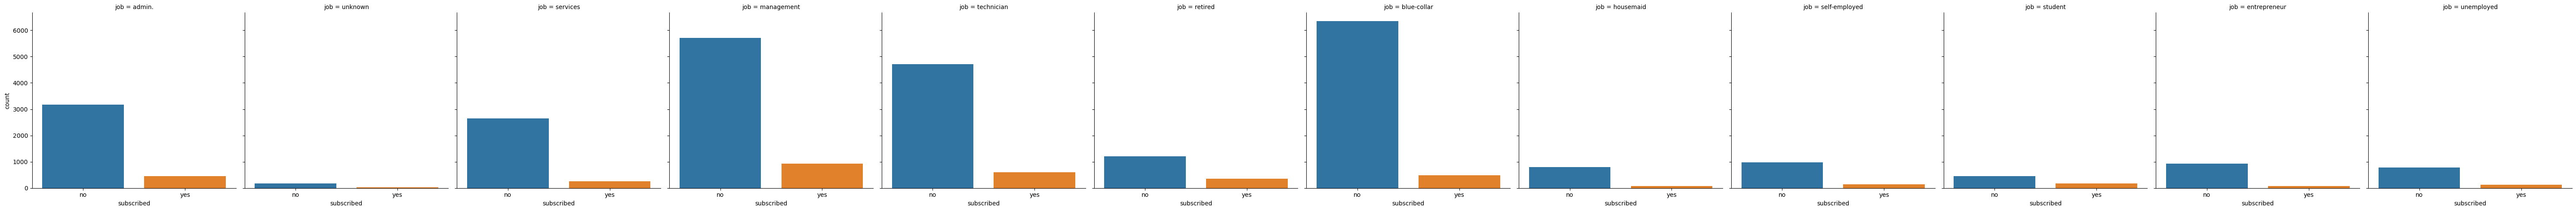

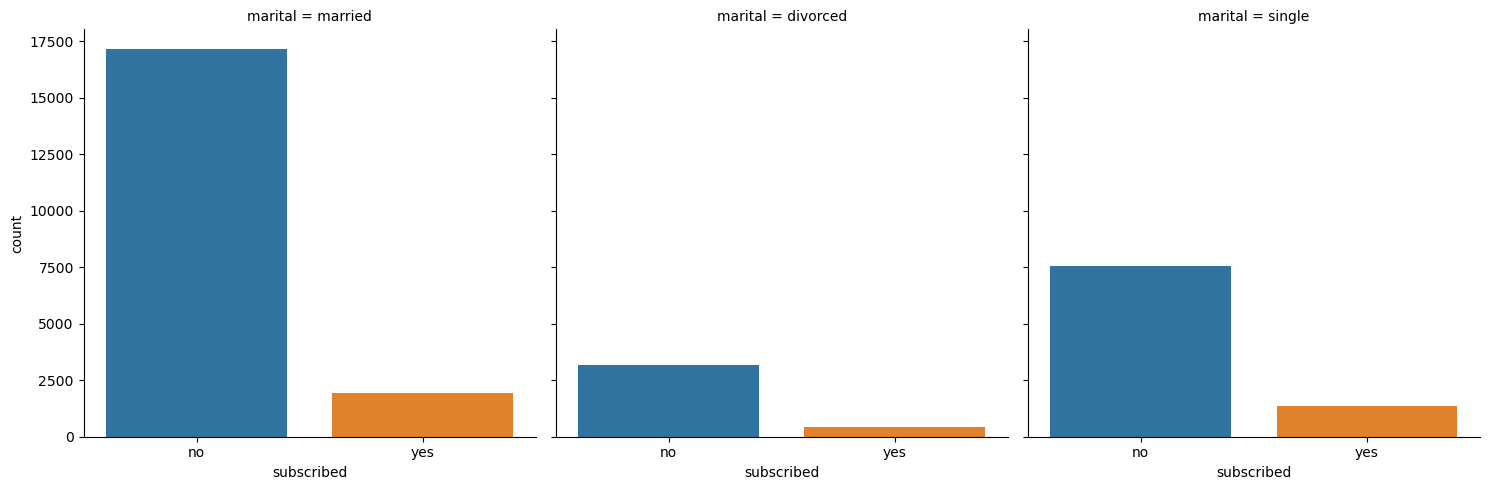

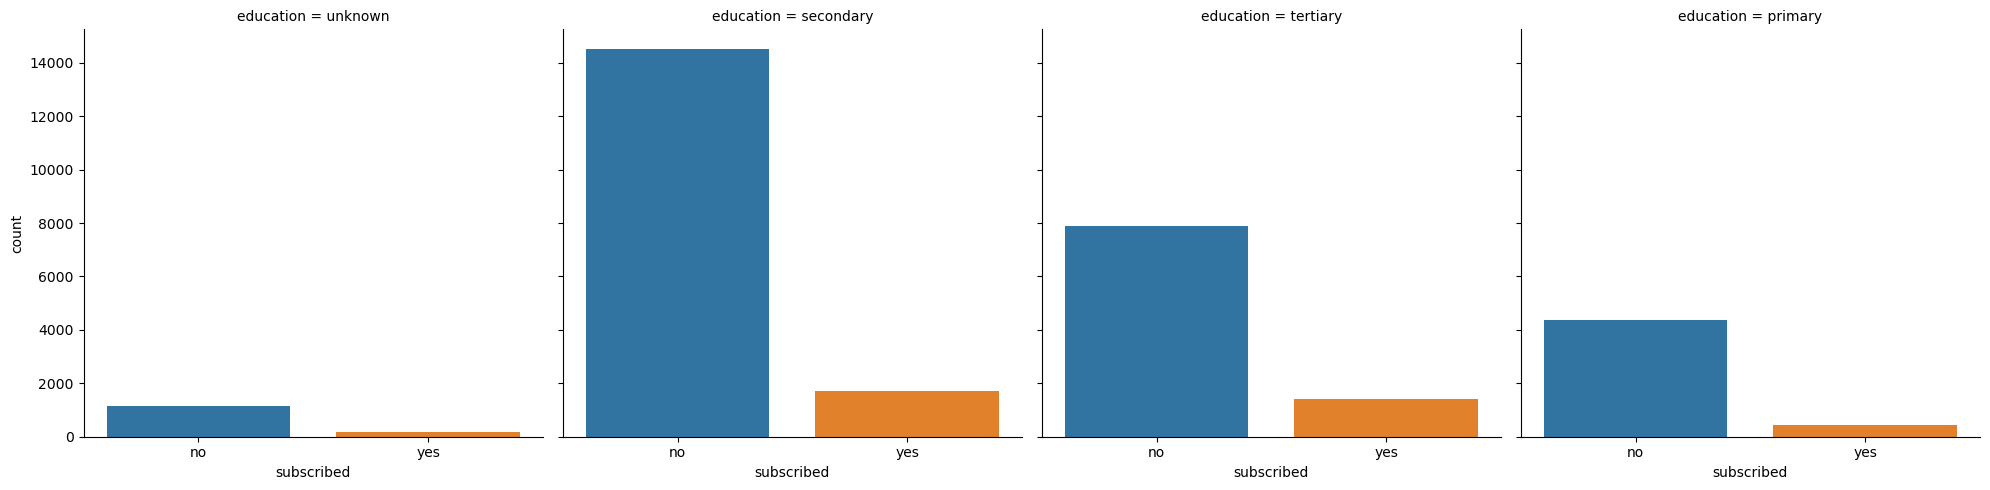

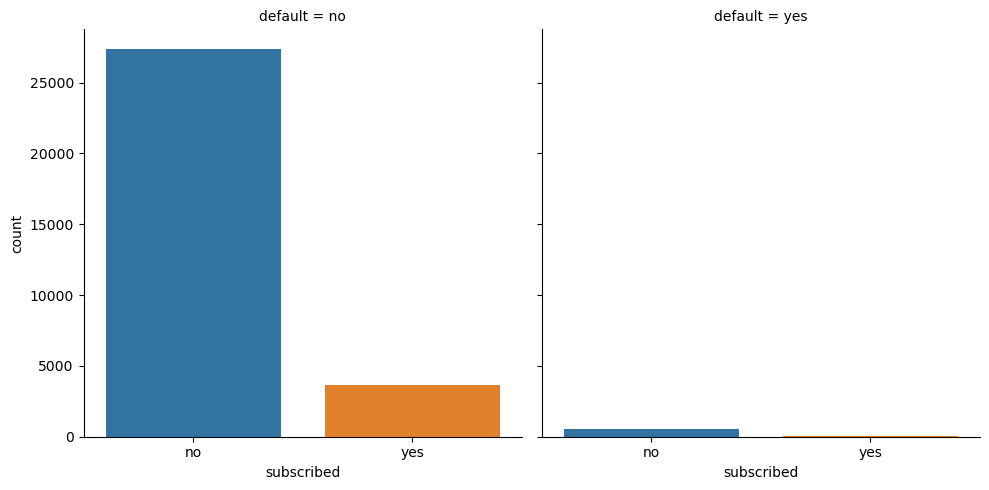

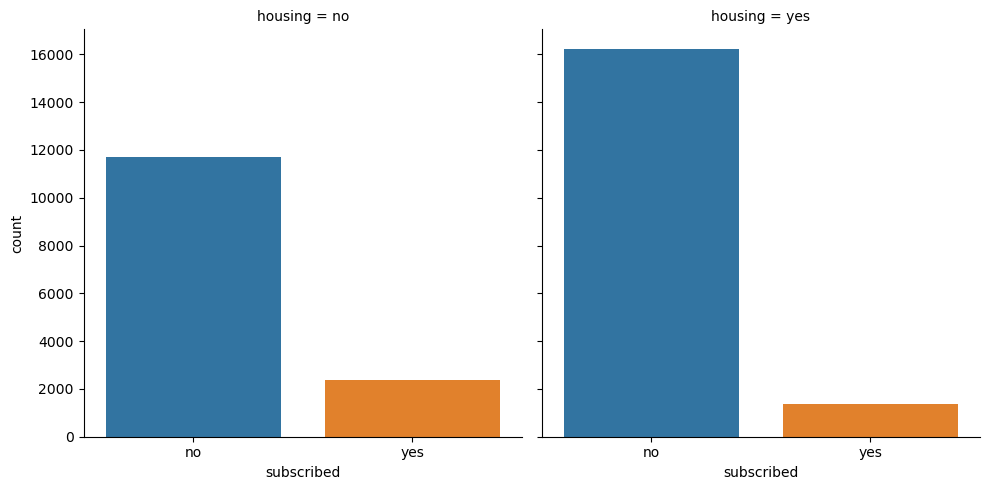

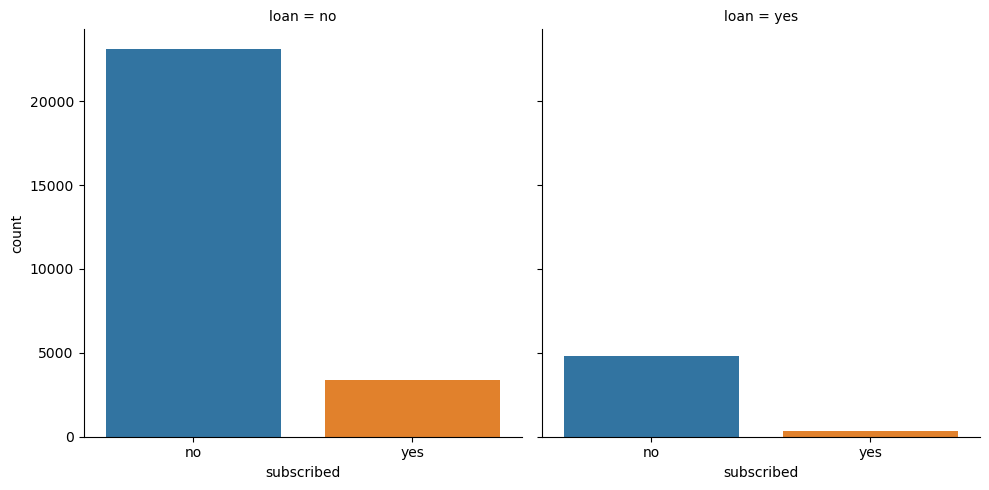

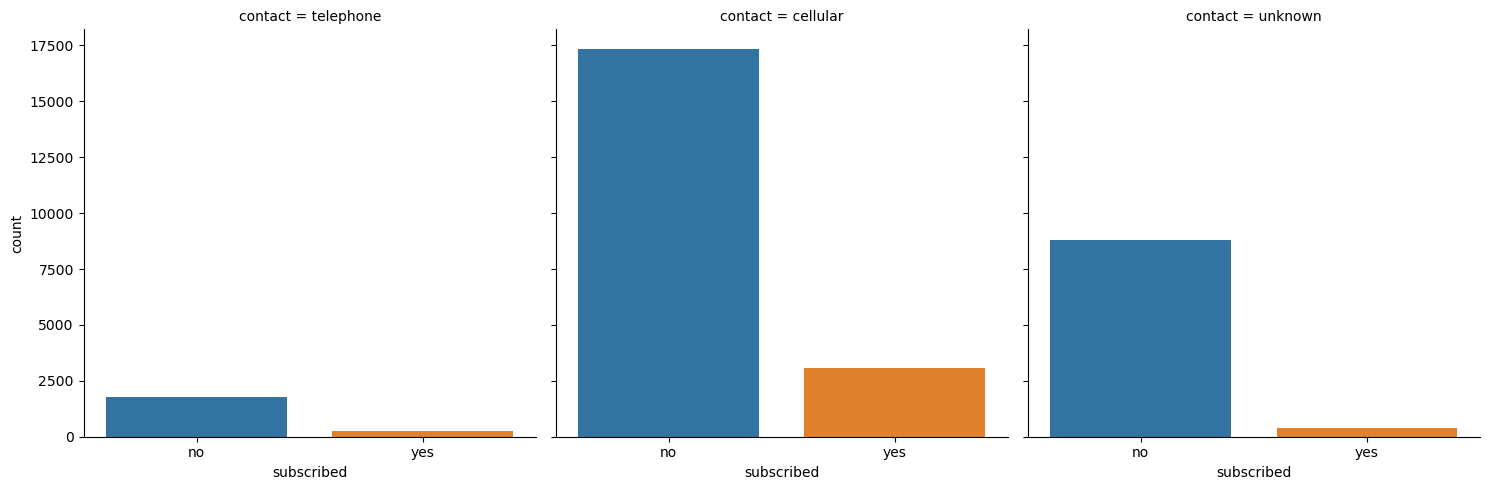

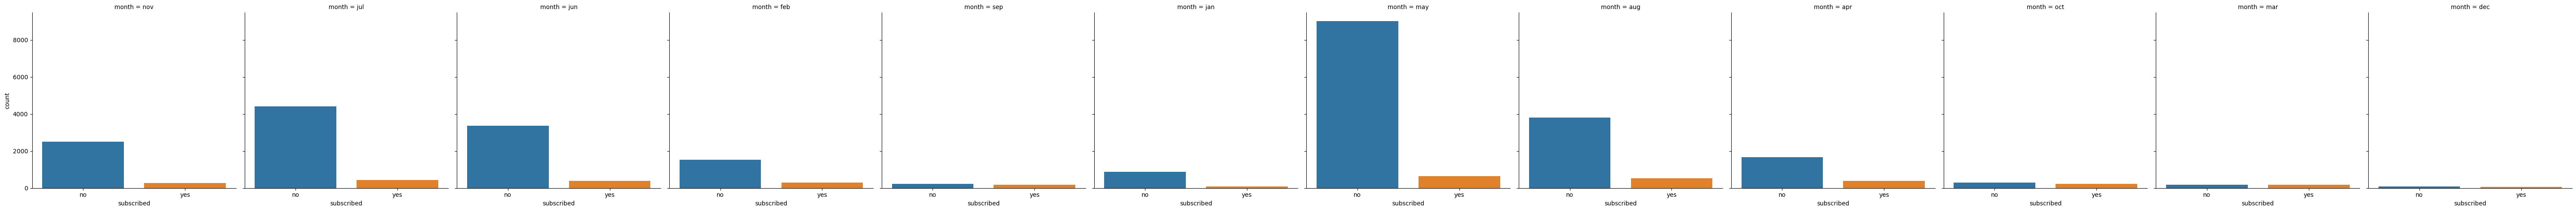

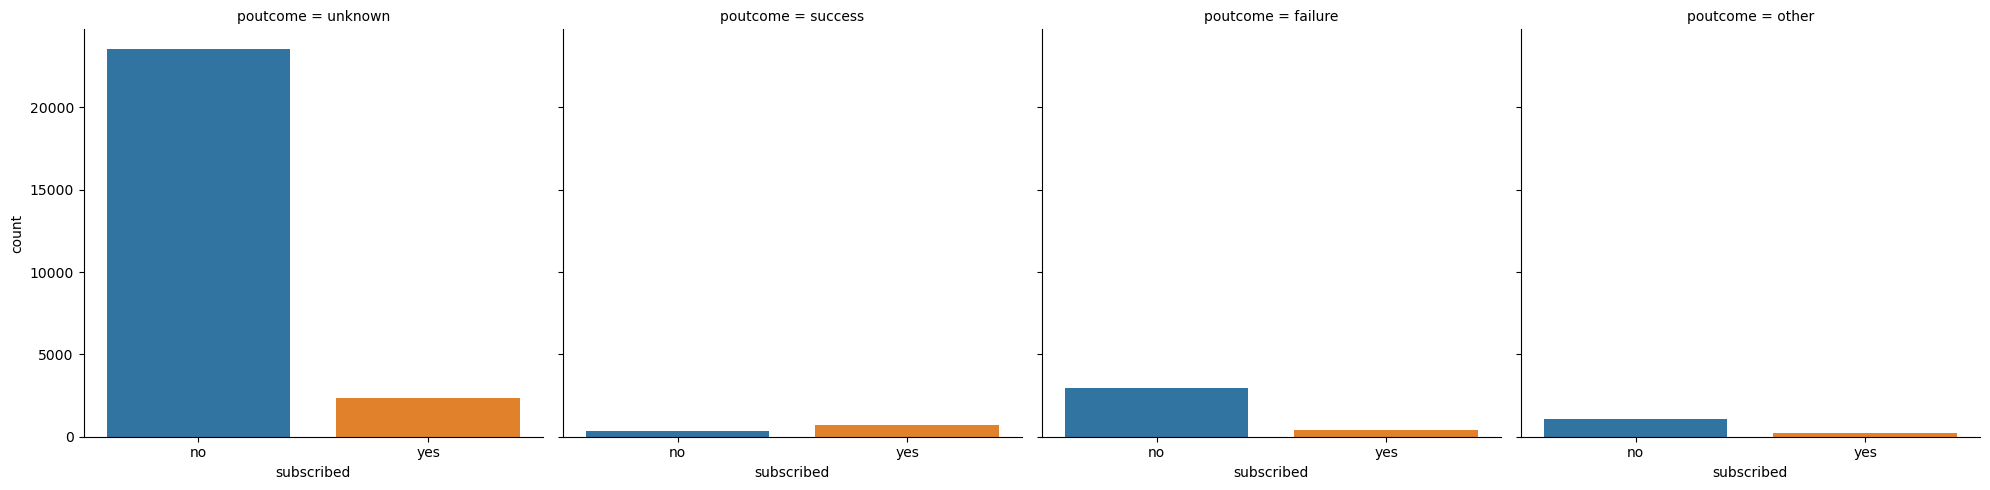

In [14]:
# check the Target variable split over categorical features
# find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x="subscribed",col=categorical_feature,kind="count",data=df)

plt.show()

In [15]:
# check target variable split over categorical featues and find the count
for categorical_feature in categorical_features:
    print(df.groupby(["subscribed",categorical_feature]).size())

subscribed  job          
no          admin.           3179
            blue-collar      6353
            entrepreneur      923
            housemaid         795
            management       5716
            retired          1212
            self-employed     983
            services         2649
            student           453
            technician       4713
            unemployed        776
            unknown           180
yes         admin.            452
            blue-collar       489
            entrepreneur       85
            housemaid          79
            management        923
            retired           362
            self-employed     140
            services          254
            student           182
            technician        594
            unemployed        129
            unknown            26
dtype: int64
subscribed  marital 
no          divorced     3185
            married     17176
            single       7571
yes         divorced      445
    

#### Observations:
1) Management clients have high  interest in subscription
2) client who has Housing loan seems to be not interested much in deposit.
3) if pre campaign outcome that is poutcome = success then there is high chance of client to be subscribed.
4) In month of august, july and may client show showed high interest in being subscribed.

### 7) Explore the numerical features

In [16]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes!='O')&(feature not in ["subscribed"]))]
print("Number of numrical variables: ",len(numerical_features))


Number of numrical variables:  7


In [17]:
# visualise the numerical variables
df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,56,1933,19,44,2,-1,0
1,31,3,20,91,2,-1,0
2,27,891,18,240,1,-1,0
3,57,3287,22,867,1,84,3
4,31,119,4,380,1,-1,0


##### so there are 7 Numerical features 

### 8) Find Discrete Numerical Features

In [18]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variable count :{}".format(len(discrete_feature)))

Discrete variable count :0


### 9) Relation between Discrete numerical feature and dataset

##### NA

### 10) Find continuous numerical feature

In [19]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature +["subscribed"]]
print("Continuous feature count : {}".format(len(continuous_features)))

Continuous feature count : 7


### 11) Distribution of continuous numerical features

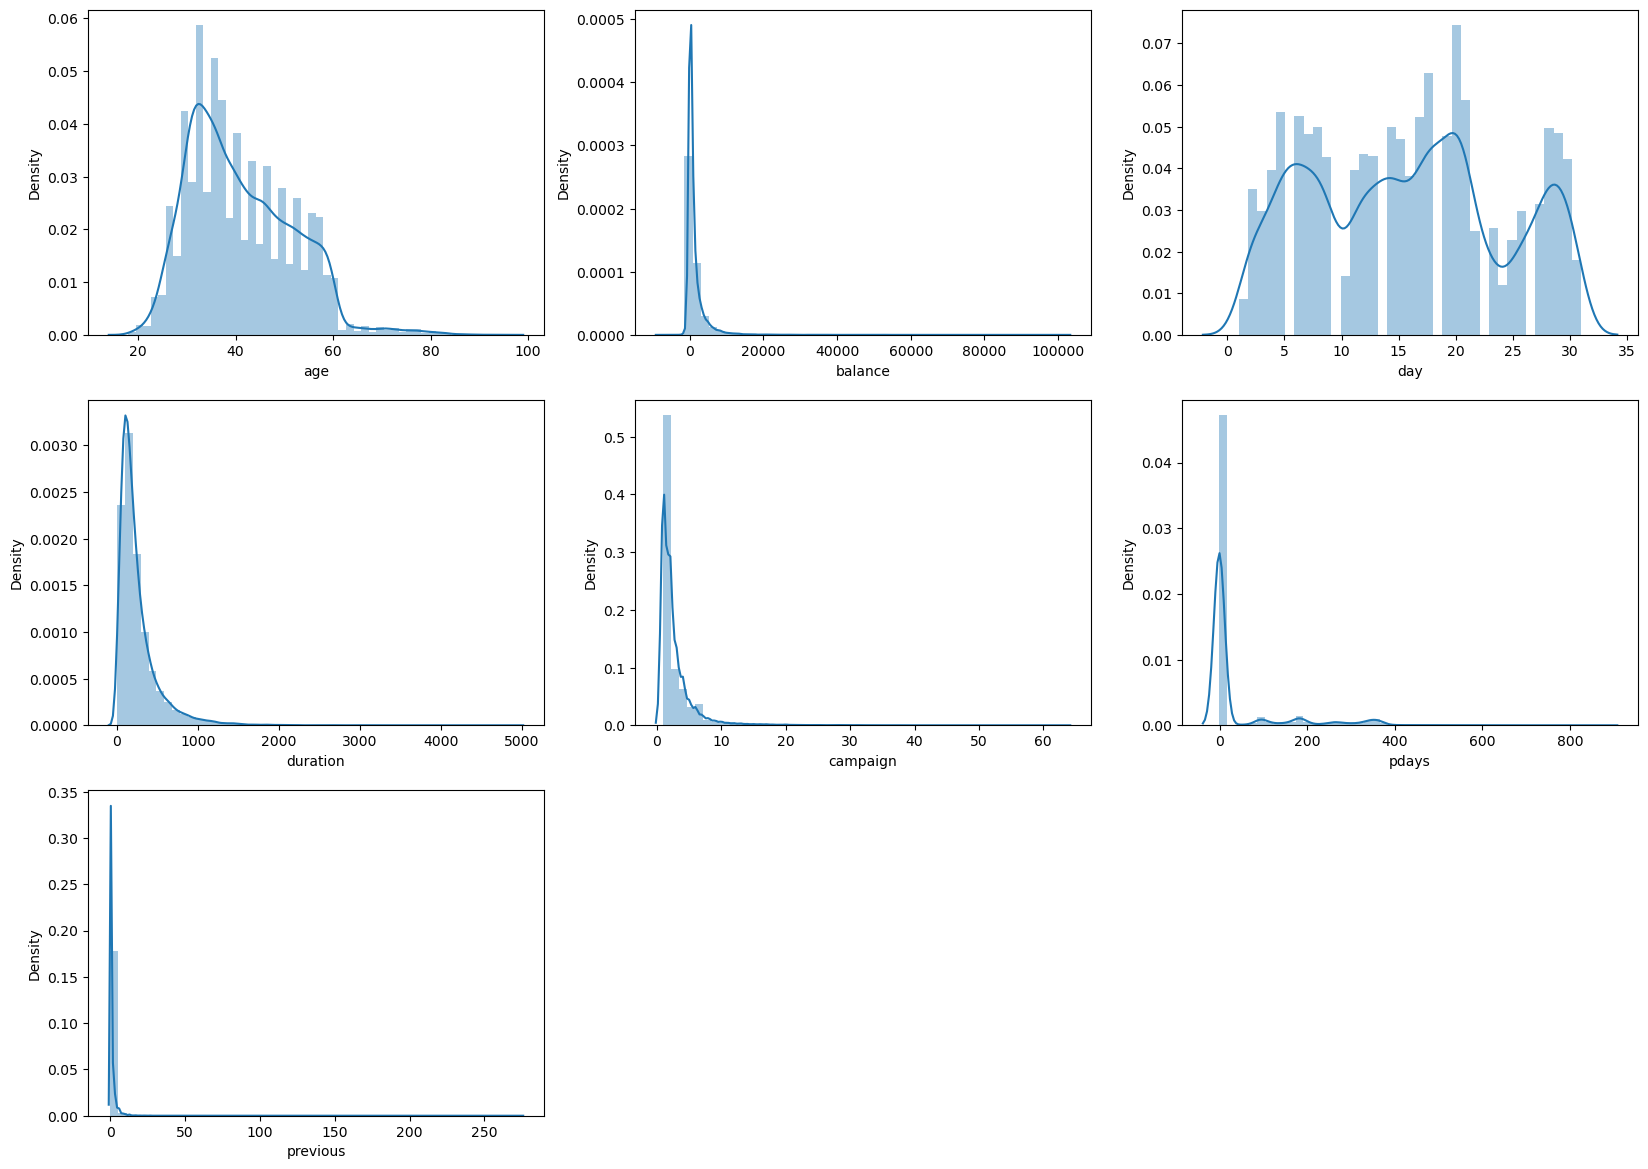

In [20]:
# lets plot univarite distribution of continuous feature observations
plt.figure(figsize=(20,60))
n=1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,n)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    n+=1

plt.show()

#### Observations:
1) It seems that age, day are distributed properly.
2) balance, duration, pdays, campaign, and previous are heavily skewed towards left and seems to be have an outliers.

### 12) Relationship between continuous numerical feature and target variable

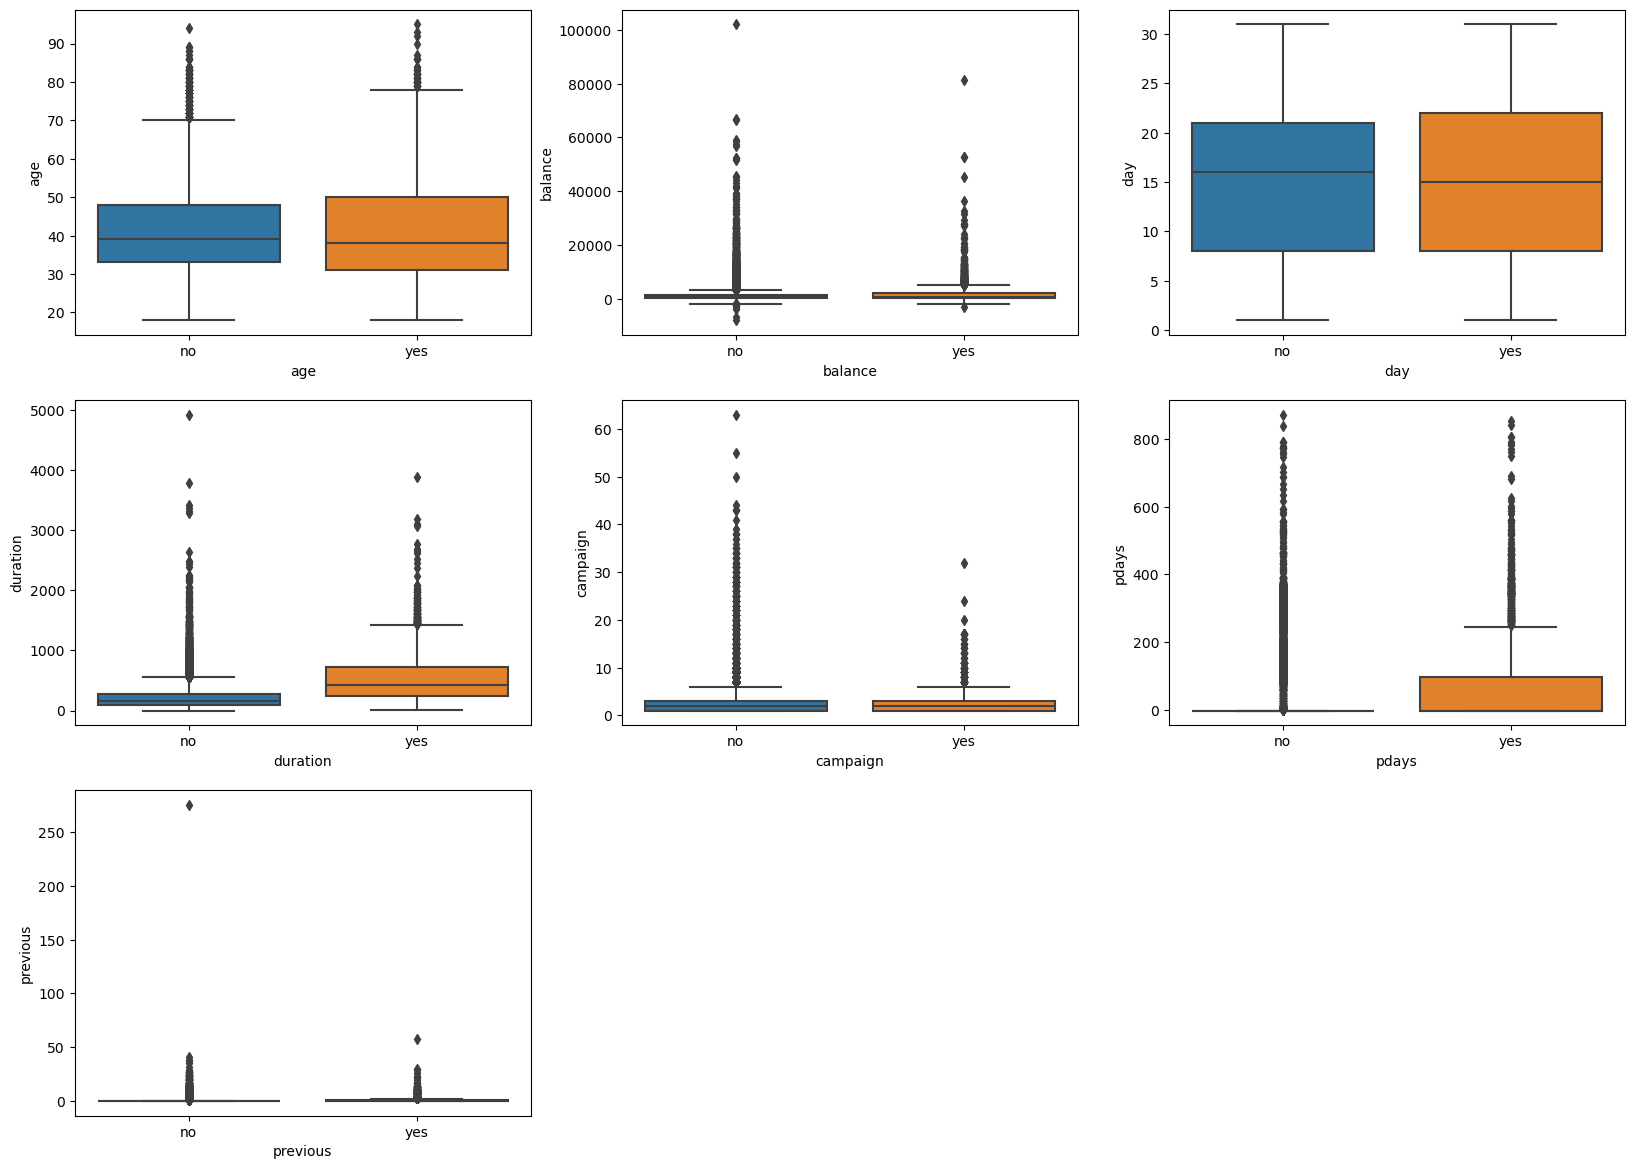

In [21]:
# boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60))
n=1
for feature in continuous_features:
    ax = plt.subplot(12,3,n)
    sns.boxplot(x="subscribed",y=df[feature],data=df)
    plt.xlabel(feature)
    n+=1

plt.show()

##### clients shows interest on deposit who had discussion for longer duration

### 13) Find Outliers  in numerical features
- form the above boxplot we can conclude that age, balance, duration, campaign, pdays and previous have some outliers

### 14) Explore the correlation between numerical features

<Axes: >

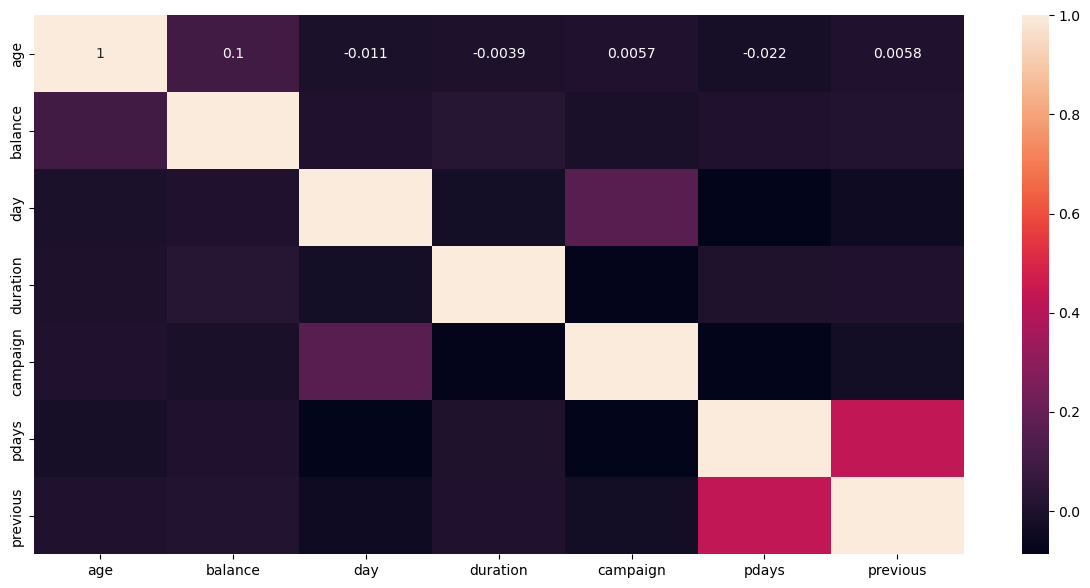

In [22]:
corr=df.corr(numeric_only=True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

##### No feature seems to be  correlated with each other

### 15) Let's check whether the data is balanced or not based on target variabel in classifiction

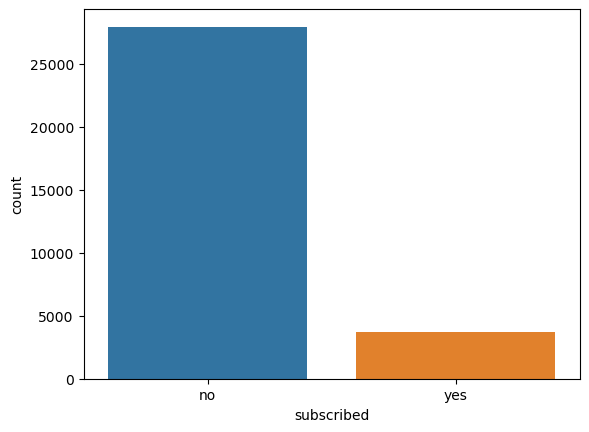

In [23]:
# total count based on subsscribed
sns.countplot(x="subscribed",data=df)
plt.show()

In [24]:
df["subscribed"].groupby(df["subscribed"]).count()

subscribed
no     27932
yes     3715
Name: subscribed, dtype: int64

Here the data is not balanced, so we will consider it during the model making

## Feature Engineering
- Drop unwanted features
- handle missing values
- handle categorical features
- handle feature scaling
- Remove Outliers

As per Exploratory Data Analysis
- no missing value found
- no feature found with one value
- default features doesnot play important role
- it seems some outliers found in age, balance, duration, compaign, pdays, and previous

In [25]:
df2 = df.copy()

In [26]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [27]:
# default feature does not play important role
df2.groupby(["subscribed","default"]).size()

subscribed  default
no          no         27388
            yes          544
yes         no          3674
            yes           41
dtype: int64

In [28]:
df2.drop(["default"],axis=1,inplace=True)

In [29]:
df2.groupby(["subscribed","pdays"]).size()

subscribed  pdays
no          -1       23553
             1           6
             2          24
             4           1
             5           7
                     ...  
yes          792         1
             804         1
             805         1
             842         1
             854         1
Length: 804, dtype: int64

In [30]:
# drop pdays as it has -1 value for more than 50% +
df2.drop(["pdays"],axis=1,inplace=True)

In [31]:
# Remove outliers in the age column
df2.groupby("age",sort=True)["age"].count()
# these can be ignored and vlaues lies in between 18 to 95

age
18     8
19    22
20    39
21    48
22    86
      ..
90     1
92     1
93     1
94     1
95     1
Name: age, Length: 76, dtype: int64

In [32]:
# remove outliers in the balance column
df2.groupby(["subscribed","balance"],sort=True)["balance"].count()

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: balance, Length: 7969, dtype: int64

##### these outliers should not be removed as balance goes high, client is more likely to be subscribed

In [33]:
# remove outliers in the duration column
df2.groupby(["subscribed","duration"],sort=True)["duration"].count()

subscribed  duration
no          0            1
            2            3
            3            3
            4           11
            5           20
                        ..
yes         2775         1
            3076         1
            3102         1
            3183         1
            3881         1
Name: duration, Length: 2381, dtype: int64

##### these outliers should not be removed as duration goes high, client is more likely to be subscribed

In [34]:
# remove outliers in the campaign column
df2.groupby(["subscribed","campaign"],sort=True)["campaign"].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
                        ...  
yes         16              2
            17              6
            20              1
            24              1
            32              1
Name: campaign, Length: 65, dtype: int64

In [35]:
df3 = df2[df2["campaign"]<33]

In [36]:
df3.groupby(["subscribed","campaign"],sort=True)["campaign"].count()

subscribed  campaign
no          1           10486
            2            7792
            3            3439
            4            2213
            5            1147
            6             845
            7             484
            8             335
            9             221
            10            173
            11            115
            12            100
            13             88
            14             65
            15             58
            16             52
            17             46
            18             37
            19             30
            20             36
            21             19
            22             18
            23             13
            24             12
            25             17
            26              9
            27              8
            28             14
            29             12
            30              6
            31              9
            32              5
yes         1      

In [37]:
# remove outliers in the previous column
df3.groupby(["subscribed","previous"],sort=True)["previous"].count()

subscribed  previous
no          0           23525
            1            1499
            2            1154
            3             580
            4             382
            5             227
            6             128
            7             102
            8              56
            9              46
            10             33
            11             38
            12             25
            13             22
            14              9
            15             15
            16              8
            17              8
            18              5
            19              7
            20              5
            21              3
            22              3
            23              5
            24              2
            25              4
            26              1
            27              4
            28              1
            29              1
            32              1
            35              1
            37     

In [38]:
df4 = df3[df3["previous"]<42]

In [40]:
df4.shape

(31617, 15)

In [41]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df4.columns:
    if df4[i].dtypes=="object":
        df4[i] = OE.fit_transform(df4[i].values.reshape(-1,1))
df4.tail(15)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
31632,33,1.0,1.0,1.0,0,1.0,0.0,2.0,21,8.0,521,3,0,3.0,1.0
31633,50,9.0,1.0,2.0,3117,0.0,0.0,2.0,9,6.0,174,1,0,3.0,0.0
31634,30,9.0,2.0,2.0,432,1.0,1.0,2.0,3,6.0,180,3,0,3.0,0.0
31635,35,4.0,1.0,2.0,4,0.0,0.0,0.0,1,11.0,157,2,0,3.0,0.0
31636,48,3.0,1.0,0.0,469,0.0,0.0,0.0,14,1.0,103,2,0,3.0,0.0
31637,44,9.0,1.0,1.0,5163,0.0,0.0,0.0,11,1.0,48,2,0,3.0,0.0
31638,29,1.0,1.0,1.0,721,1.0,0.0,0.0,23,5.0,644,1,0,3.0,0.0
31639,38,7.0,2.0,1.0,570,1.0,0.0,2.0,5,8.0,75,2,0,3.0,0.0
31640,43,4.0,2.0,1.0,2968,0.0,0.0,2.0,20,6.0,30,4,0,3.0,0.0
31641,37,9.0,2.0,2.0,1309,0.0,0.0,2.0,6,6.0,442,2,0,3.0,0.0


## spliting the traing set and test set

In [44]:
x = df4.drop(["subscribed"],axis=1)
y = df4["subscribed"]

## Now lets balance the data (Oversampling)

In [47]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [48]:
# Checking value count of target column
y.value_counts()

subscribed
0.0    27903
1.0     3714
Name: count, dtype: int64

In [49]:
y1.value_counts()

subscribed
0.0    27903
1.0    27903
Name: count, dtype: int64

## Model selection

### Finding the best random State

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is ",maxAccu,"at random_state ",maxRS)

Best accuracy is  0.9511408433878867 at random_state  20


## creating train test split

In [55]:
 x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.30,random_state=maxRS)

## Classification Algorithm

In [56]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

### 1) RandomForestClassifier

In [61]:
# Checking accuracy of RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9505435431848047
[[8109  316]
 [ 512 7805]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      8425
         1.0       0.96      0.94      0.95      8317

    accuracy                           0.95     16742
   macro avg       0.95      0.95      0.95     16742
weighted avg       0.95      0.95      0.95     16742



### 2) Logistic Regression

In [59]:
# Checking accuracy of Logistic Regression
lc = LogisticRegression()
lc.fit(x_train,y_train)
predlc = lc.predict(x_test)
print(accuracy_score(y_test,predlc))
print(confusion_matrix(y_test,predlc))
print(classification_report(y_test,predlc))

0.7912435790228168
[[6636 1789]
 [1706 6611]]
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      8425
         1.0       0.79      0.79      0.79      8317

    accuracy                           0.79     16742
   macro avg       0.79      0.79      0.79     16742
weighted avg       0.79      0.79      0.79     16742



### 3) Support Vector Machine Classifier


In [60]:
# Checking accuracy of Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7325886990801577
[[6818 1607]
 [2870 5447]]
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75      8425
         1.0       0.77      0.65      0.71      8317

    accuracy                           0.73     16742
   macro avg       0.74      0.73      0.73     16742
weighted avg       0.74      0.73      0.73     16742



### 4) Gradient Boosting Classifier

In [63]:
# Checking accuracy of  Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.9409270099151834
[[8033  392]
 [ 597 7720]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      8425
         1.0       0.95      0.93      0.94      8317

    accuracy                           0.94     16742
   macro avg       0.94      0.94      0.94     16742
weighted avg       0.94      0.94      0.94     16742



### 5)AdaBoost Classifier

In [64]:
# Checking accuracy of AdaBoost Classifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
predab = ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.9304145263409389
[[7951  474]
 [ 691 7626]]
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      8425
         1.0       0.94      0.92      0.93      8317

    accuracy                           0.93     16742
   macro avg       0.93      0.93      0.93     16742
weighted avg       0.93      0.93      0.93     16742



### 6) BaggingClassifier

In [65]:
# Checking accuracy of BaggingClassifier
bc =  BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))

0.9406283598136423
[[8044  381]
 [ 613 7704]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      8425
         1.0       0.95      0.93      0.94      8317

    accuracy                           0.94     16742
   macro avg       0.94      0.94      0.94     16742
weighted avg       0.94      0.94      0.94     16742



### 7) ExtraTreesClassifier

In [66]:
# Checking accuracy of ExtraTreesClassifier
etc =  ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc = etc.predict(x_test)
print(accuracy_score(y_test,predetc))
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

0.9546051845657627
[[8085  340]
 [ 420 7897]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      8425
         1.0       0.96      0.95      0.95      8317

    accuracy                           0.95     16742
   macro avg       0.95      0.95      0.95     16742
weighted avg       0.95      0.95      0.95     16742



## Cross Valiadation Score

In [68]:
# Checking cv score for RandomForestClassifier
score = cross_val_score(rfc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score for Random Forest Classifier is ",accuracy_score(y_test,predrfc)-score.mean())

[0.73490414 0.97545023 0.97356868 0.97356868 0.97168712]
0.9258357691221388
Difference between Accuracy score and cross validation score for Random Forest Classifier is  0.024707774062665888


In [69]:
# Checking cv score for LogisticRegression
score = cross_val_score(lc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score for LogisticRegression is ",accuracy_score(y_test,predlc)-score.mean())

[0.76545422 0.79150614 0.78738464 0.79123734 0.78227757]
0.7835719836176027
Difference between Accuracy score and cross validation score for LogisticRegression is  0.0076715954052141155


In [70]:
# Checking cv score for GradientBoostingClassifier
score = cross_val_score(gb,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score for GradientBoostingClassifier is ",accuracy_score(y_test,predgb)-score.mean())

[0.71806128 0.96299615 0.96398172 0.96631126 0.96272735]
0.9148155530637159
Difference between Accuracy score and cross validation score for GradientBoostingClassifier is  0.02611145685146754


In [72]:
# Checking cv score for support Vector Machine Classifier
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score for support Vector Machine Classifier is ",accuracy_score(y_test,predsvc)-score.mean())

[0.72585558 0.72224711 0.72493504 0.72215751 0.72027596]
0.7230942414553995
Difference between Accuracy score and cross validation score for support Vector Machine Classifier is  0.009494457624758201


In [73]:
# Checking cv score for AdaBoosting Classifier
score = cross_val_score(ab,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score for AdaBoosting Classifier is ",accuracy_score(y_test,predab)-score.mean())

[0.73848773 0.95475316 0.95287161 0.95815787 0.95134845]
0.911123761531651
Difference between Accuracy score and cross validation score for AdaBoosting Classifier is  0.01929076480928793


In [74]:
# Checking cv score for Bagging Classifier
score = cross_val_score(bc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score for Bagging Classifier is ",accuracy_score(y_test,predbc)-score.mean())

[0.72818491 0.97159753 0.96774483 0.96702804 0.96711764]
0.920334590360844
Difference between Accuracy score and cross validation score for Bagging Classifier is  0.02029376945279837


In [75]:
# Checking cv score for Extra Trees Classifier
score = cross_val_score(etc,x1,y1)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score for Extra Trees Classifier is ",accuracy_score(y_test,predetc)-score.mean())

[0.80415696 0.97491264 0.97536063 0.9764358  0.97383747]
0.9409407014253002
Difference between Accuracy score and cross validation score for Extra Trees Classifier is  0.013664483140462536


#### Here the Extra tree classifier performed the best 

## Hyper Parameter Tuning

In [76]:
# Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

parameters={"criterion":["gini","entropy"],
           "random_state":[10,50,1000],
           "max_depth":[0,10,20],
           "n_jobs":[-2,-1,1],
           "n_estimators":[50,100,200,300]}

In [77]:
gcv = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [78]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [79]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 1000}

In [80]:
final_model = ExtraTreesClassifier(criterion="gini",max_depth=20,n_estimators=300,n_jobs=-2,random_state=1000)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

94.37343208696691


## Plotting ROC and compare AUC for all the models used


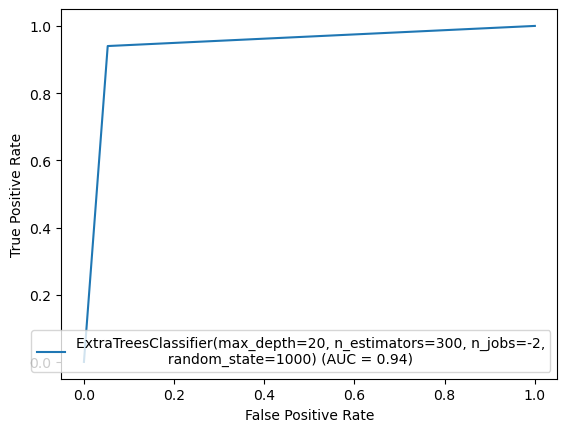

In [81]:
# plotting for all the models used here
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

## Saving the model

In [82]:
#savig the model using .pkl
import joblib
joblib.dump(final_model,'Bank_Marketing.pkl')

['Bank_Marketing.pkl']

## Predicting from the saved model

In [85]:
# lets load the saved modle and get the predictions
model = joblib.load("Bank_Marketing.pkl")

#predictions
prediction = model.predict(x_test)
prediction

array([1., 1., 1., ..., 1., 0., 0.])

In [86]:
a = np.array(y_test)
df=pd.DataFrame()
df["predicted"] = prediction
df["original"] = a
df.sample(30)

,predicted,original
1721,1.0,1.0
2125,0.0,0.0
15350,1.0,1.0
16318,0.0,0.0
6579,0.0,0.0
13654,1.0,1.0
1857,1.0,1.0
4498,0.0,0.0
13620,1.0,1.0
16459,1.0,1.0


## now lets predict with the test dataset set provided

In [87]:
test_set = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

In [95]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in test_set.columns:
    if test_set[i].dtypes=="object":
        test_set[i] = OE.fit_transform(test_set[i].values.reshape(-1,1))
test_set.tail(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13549,8494,32,7.0,1.0,1.0,0.0,1464,1.0,0.0,2.0,3,6.0,193,1,-1,0,3.0
13550,1901,35,4.0,2.0,2.0,0.0,-202,1.0,0.0,2.0,9,8.0,1461,2,-1,0,3.0
13551,35493,56,9.0,1.0,1.0,0.0,264,1.0,1.0,0.0,7,8.0,639,2,280,5,2.0
13552,15162,45,9.0,1.0,1.0,0.0,1081,1.0,0.0,0.0,17,5.0,127,3,-1,0,3.0
13553,20780,50,6.0,1.0,1.0,0.0,36,0.0,0.0,0.0,13,1.0,104,10,-1,0,3.0
13554,11568,51,10.0,1.0,1.0,0.0,-267,0.0,1.0,2.0,19,6.0,208,2,-1,0,3.0
13555,23487,34,4.0,2.0,2.0,0.0,1070,0.0,0.0,0.0,28,1.0,91,15,-1,0,3.0
13556,27122,46,6.0,1.0,0.0,0.0,3155,1.0,0.0,0.0,21,9.0,271,1,-1,0,3.0
13557,837,30,7.0,2.0,1.0,0.0,-174,1.0,0.0,2.0,7,8.0,113,1,-1,0,3.0
13558,35237,32,9.0,2.0,1.0,0.0,129,1.0,0.0,0.0,7,8.0,213,1,-1,0,3.0


In [96]:
# lets load the saved modle and get the predictions
model = joblib.load("Bank_Marketing.pkl")

#predictions
prediction = model.predict(test_set.drop(columns=["ID","default","pdays"],axis=1))
prediction

array([0., 0., 0., ..., 0., 1., 0.])

In [98]:
prediction_by_model = pd.DataFrame()
prediction_by_model["prediction"]=prediction
prediction_by_model.sample(10)

,prediction
8271,0.0
5408,0.0
12627,0.0
9693,0.0
7632,0.0
9682,0.0
5561,0.0
10010,1.0
4216,0.0
1576,0.0


In [99]:
prediction_by_model.shape

(13564, 1)

## so these are the predicted values for the test data set provided